# Hacker Statistics – Random Walk Simulation (Python)

This project simulates a **random walk** process inspired by the *Hacker Statistics*
case study from **DataCamp – Intermediate Python**.

By repeatedly simulating the same stochastic process, we estimate the probability
of reaching a target step under uncertainty.

**Tools:** Python, NumPy, Matplotlib


## Problem Description

A player starts at **step 0** and rolls a six-sided die **100 times**.

**Rules**
- Dice = **1 or 2** → move **down 1 step** (cannot go below 0)
- Dice = **3, 4, 5** → move **up 1 step**
- Dice = **6** → roll the dice again and move up by the second result (1–6)
- With probability **0.5% (0.005)**, the player **falls back to step 0**

**Goal:**  
Estimate the probability that the final step is **≥ 60**.


In [74]:
import numpy as np
import matplotlib.pyplot as plt

# Reproducibility
np.random.seed(123)

# Parameters
n_steps = 100
n_sims = 500
fall_prob = 0.005
target = 60


## 1) Single Random Walk

A single walk helps visualize how the process behaves.


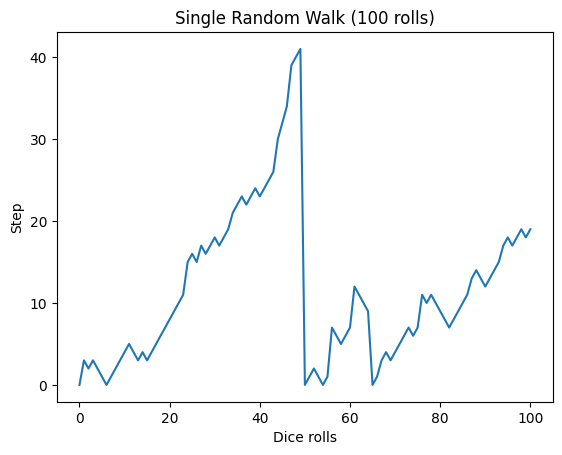

Final step: 19


In [75]:
random_walk = [0]

for i in range(n_steps):
    step = random_walk[-1]
    dice = np.random.randint(1, 7)

    if dice <= 2:
        step = max(0, step - 1)
    elif dice <= 5:
        step = step + 1
    else:
        step = step + np.random.randint(1, 7)

    if np.random.rand() <= fall_prob:
        step = 0

    random_walk.append(step)

plt.plot(random_walk)
plt.title("Single Random Walk (100 rolls)")
plt.xlabel("Dice rolls")
plt.ylabel("Step")
plt.show()

print("Final step:", random_walk[-1])


## 2) Multiple Simulations

We repeat the same experiment **500 times** to estimate probabilities.


In [76]:
# Reset seed so results are stable even with Run All
np.random.seed(123)

all_walks = []

for i in range(n_sims):
    random_walk = [0]

    for x in range(n_steps):
        step = random_walk[-1]
        dice = np.random.randint(1, 7)

        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1, 7)

        if np.random.rand() <= fall_prob:
            step = 0

        random_walk.append(step)

    all_walks.append(random_walk)

np_aw = np.array(all_walks)
np_aw_t = np.transpose(np_aw)
print(np_aw)


[[ 0  3  2 ... 19 18 19]
 [ 0  5  4 ... 90 93 94]
 [ 0  0  1 ... 80 81 82]
 ...
 [ 0  0  1 ... 92 91 90]
 [ 0  1  0 ... 59 58 57]
 [ 0  1  0 ... 22 23 27]]


## 3) Visualization of All Walks

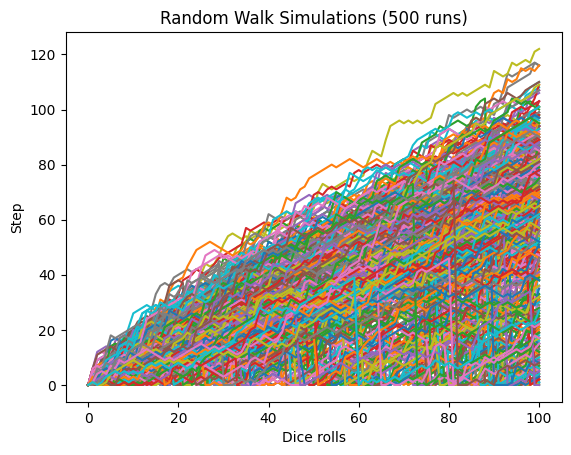

In [77]:
plt.plot(np_aw_t)
plt.title("Random Walk Simulations (500 runs)")
plt.xlabel("Dice rolls")
plt.ylabel("Step")
plt.show()


## 4) Distribution of Final Steps


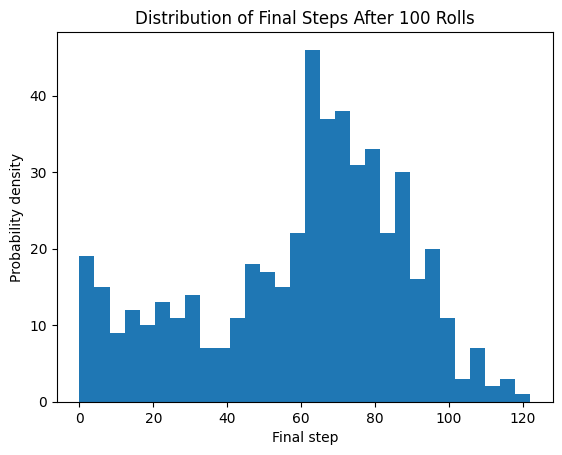

In [78]:
ends = np_aw_t[-1]

plt.hist(ends, bins=30)
plt.title("Distribution of Final Steps After 100 Rolls")
plt.xlabel("Final step")
plt.ylabel("Probability density")
plt.show()


## 5) Probability Estimation


In [79]:
probability = np.mean(ends >= target)

print(
    "Estimated probability of reaching step",
    target,
    "is",
    round(probability * 100, 2),
    "%"
)


Estimated probability of reaching step 60 is 60.8 %


## Conclusion

- The random walk shows large variability due to randomness and fall events
- Repeating the simulation allows probability estimation without analytical formulas
- With `seed = 123`, `500` simulations, and `fall_prob = 0.005`,
  the estimated probability is reproducible

This project demonstrates simulation-based probability estimation using Python.
